In [20]:
# import in requried libaries ;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [21]:
# importing the file for analysis:
file = pd.read_csv("/content/Zomato data .csv")

In [22]:
# Checking the columns:
file.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [23]:
# checking for null values in file:
file.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


<Axes: xlabel='listed_in(type)', ylabel='count'>

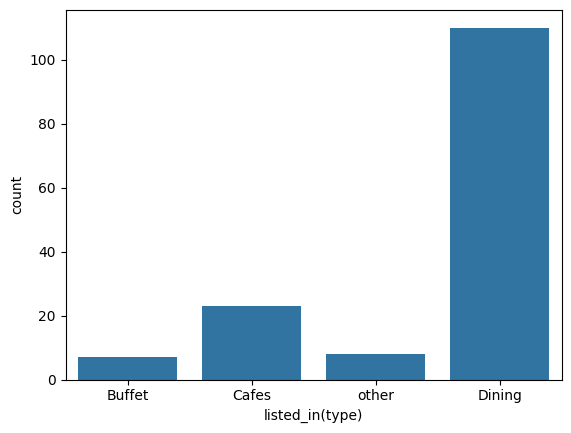

In [24]:
# different types of restaurants based on count according to the category:
sb.countplot(x=file['listed_in(type)'])


From the above graph is say that the majority of restaurants are falls under the Dining.

Text(0, 0.5, 'Votes')

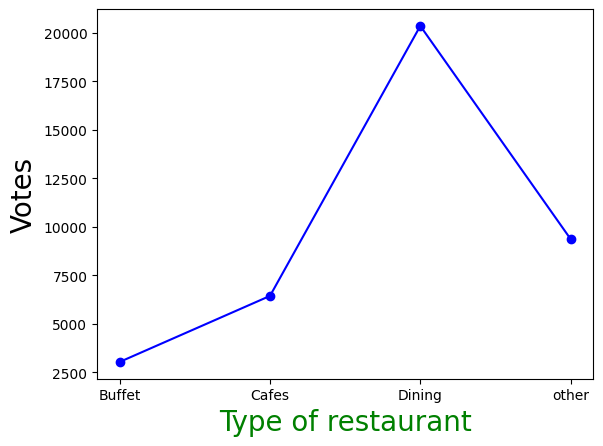

In [41]:
# graph shows the people likes what according to category:
grouped_data = file.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Type of restaurant", c="green", size=20)
plt.ylabel("Votes", c="black", size=20)

from the above graph we can say that the dining are preferred by more people.

In [31]:
# best restaurant based on the votes:
max_votes = file['votes'].max()
restaurant_with_max_votes = file.loc[file['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


By the above code we say that the Empire Restaurant is the best restaurant.


<Axes: xlabel='online_order', ylabel='count'>

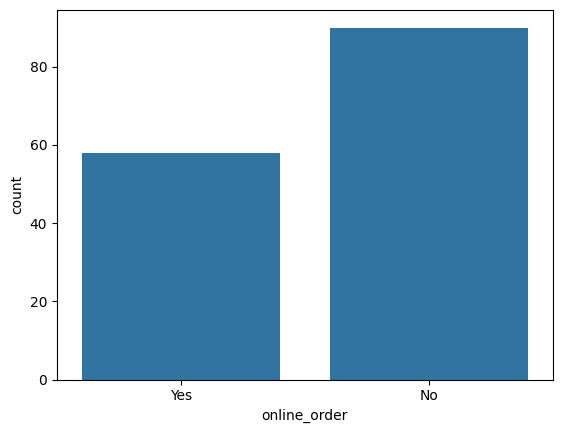

In [32]:
# order type count online or offline:
sb.countplot(x=file['online_order'])

The above graphs shows more restaurants do not accept the online orders.

Text(0.5, 1.0, 'Ratings Distribution')

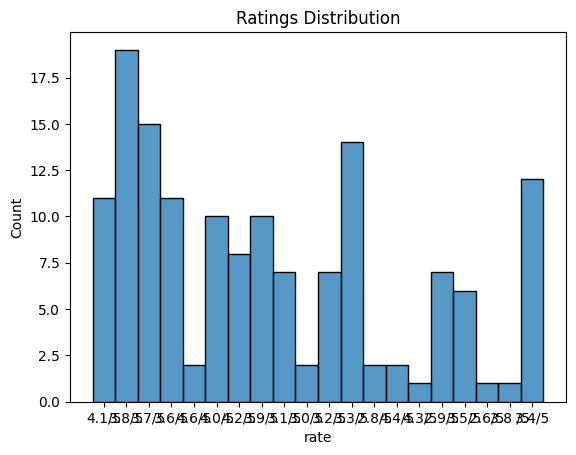

In [36]:
# rating distribution:
sb.histplot(file['rate'])
plt.title("Ratings Distribution")

Most of the restuarants get ratings range from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

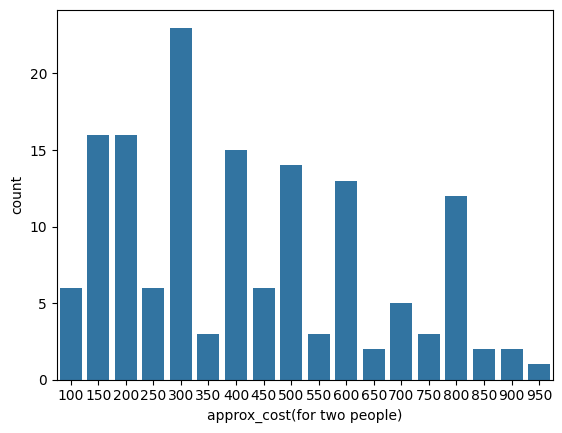

In [37]:
# restuarants liked by the couple based on the price:
couple_data=file['approx_cost(for two people)']
sb.countplot(x=couple_data)

From the above graph we can conclude that the couple prefer the restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

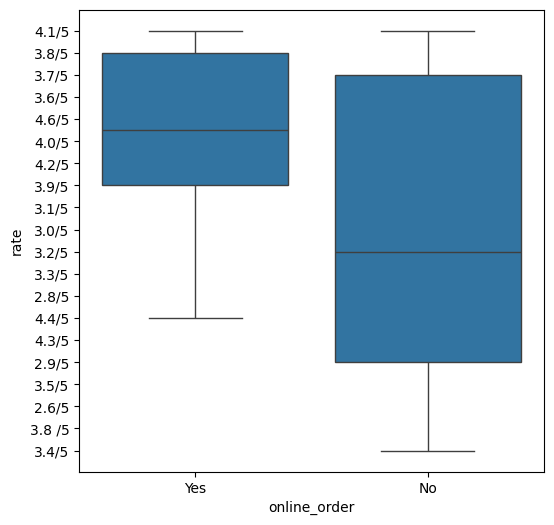

In [38]:
# rating of the orders based on the mode(online or offline):
plt.figure(figsize = (6,6))
sb.boxplot(x = 'online_order', y = 'rate', data = file)

From the above the graph we conclude that the rating of the online orders is greater than the ratings of the offline orders.

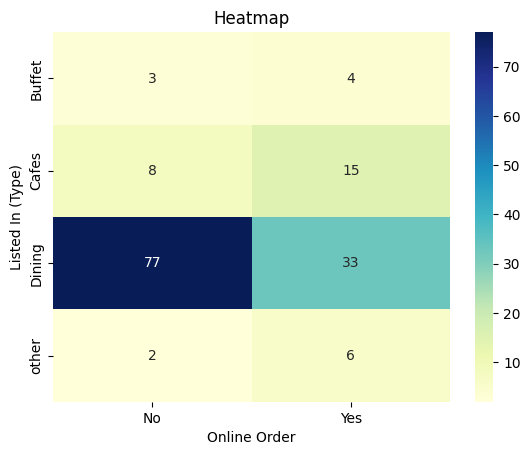

In [43]:
# heatmap based on Online orders and Listed in(type):
pivot_table = file.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sb.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

From the Heat Map we conclude that Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

To address the analysis,need to respond to the subsequent inquiries:

1.Do a greater number of restaurants provide online delivery as opposed to offline services?
Ans:offline delivery


2.Which types of restaurants are the most favored by the general public?
Ans: The restaurants which provided the Online delivery.


3.What price range is preferred by couples for their dinner at restaurants?
Ans: The couple prefers the price range of 300 at their restaurants.
